In [1]:
###############################################
# Support cours 3 : Maximum de vraisemblance  #
###############################################

In [6]:
import pandas as pd 
import numpy as np
from shapely.geometry import Polygon, Point
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
# Fonctions utilisés pour illustrés le concept de densité , fonction de masse puis maximum de vraisemblance

def simu_discrete(masse_df, nb_obs= 1000):
    simulation = []
    for i in range(masse_df.shape[0]):
        value = masse_df["value"].iloc[i]
        proba = masse_df["proba"].iloc[i]
        simulation += [value]*int(proba*nb_obs)
    return np.random.permutation(np.array(simulation))

def simu_continuous(density,nb_filling=10000, min_val=-10, max_val=10, max_freq=200):
    data = pd.DataFrame()
    data["x"] = np.random.uniform(low=min_val,high=max_val,size=nb_filling)
    data["y"] = np.random.uniform(low=0, high=max_freq, size=nb_filling)
    data["density"] = data["x"].apply(density)*nb_filling
    return data["x"][data["y"]<=data["density"]]
    

In [40]:
example_discrete = pd.DataFrame({"value":[1,4,7,8],"proba":[0.1,0.4,0.3,0.2]})
example_discrete

,value,proba
0,1,0.1
1,4,0.4
2,7,0.3
3,8,0.2


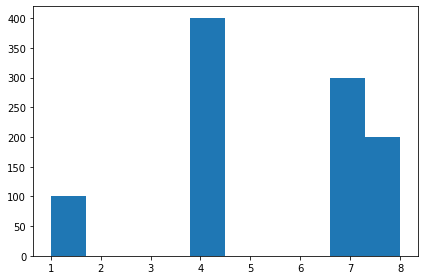

In [41]:
simulation = simu_discrete(example_discrete,nb_obs=1000)
plt.hist(simulation)
plt.tight_layout()

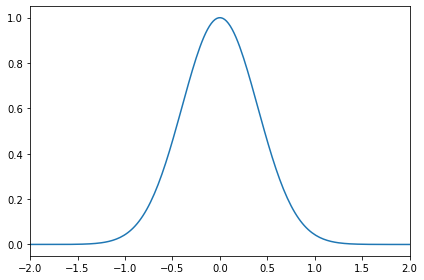

In [42]:
def example_continuous(x):
    return np.exp(-np.pi*x**2)
x = np.linspace(-10,10,1000)
plt.plot(x, [example_continuous(u) for u in x])
plt.xlim(-2,2)
plt.tight_layout()

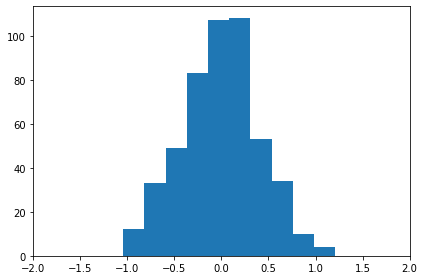

In [46]:
simulation = simu_continuous(example_continuous,nb_filling=10000, min_val=-10, max_val=10, max_freq=10000)
plt.hist(simulation)
plt.xlim(-2,2)
plt.tight_layout()

On observe : $Y_{1},Y_{2},...,Y_{n}$  
On fait l'hypothèse que : $Y_{i}$ suit une loi de densité/ fonction de masse $F(Y_{i},X_{i}A)$   
  
La vraisemblance $L(A|Y,X)$ est alors définie de la manière suivante:  
$L(A|Y,X) = \prod_{i} F(Y_{i},X_{i}A)$  
  
Si les observations sont indépendantes , il s'agit de la "densité" du vecteur $(Y_{1},Y_{2},...,Y_{n})$  
L'estimation du vecteur de coefficients  $A$ se fait en maximisant la quantité $L(A|Y,X)$  
  
Pour se faire, on utilise $l(A|Y,X)=log(L(A|Y,X)) = \sum_{i}log(F(Y_{i},X_{i}A))$   
En effet, cela nous permet d'avoir un critère simple de maximisation(somme de fonctions concaves dérivables)
  
Exemple continu:  
On observe $Y_{1}$ et $ Y_{2}$. Avec pour modélisation: $Y\sim N(XA,\sigma^{2})$  
$L(A|Y,X) = \frac{1}{\sigma \sqrt{2*\pi}}e^{-0.5*(\frac{Y_{1}-X_{1}A}{\sigma})^{2}}*\frac{1}{\sigma \sqrt{2*\pi}}e^{-0.5*(\frac{Y_{2}-X_{2}A}{\sigma})^{2}}$


<b>Cas d'une modélisation constante : $ XA = cst$</b>

Dans quel cas cela se produit il ?

On a alors:  
$l(A|Y,X)=\sum_{i} log(F(Y_{i},cst)=K+\sum_{i}-0.5*(\frac{Y_{i}-cst}{\sigma})^{2}$  
Le maximum étant atteint quand la dérivé par rapport à $cst$ est nulle, on obtient:  
$\sum_{i}(cst_{est}-Y_{i}) = 0$  
D'où la dénomination d'approche fréquentiste: $cst_{est}=\frac{1}{n}\sum_{i}{Y_{i}} $


<b>Cas général</b>

In [ ]:
l